In [1]:
# Imports for Talos and Keras

import plaidml.keras
plaidml.keras.install_backend()

import talos as ta
from talos.utils import metrics

from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Dropout
from keras.layers.core import Activation
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.activations import relu, elu
from keras import regularizers
from keras import optimizers

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [9]:
# load the sarcoma transcriptome data
sarcoma_df = pd.read_csv('../Data/sarcoma-gene-exp-FPKM-zscore-no-label-nomfs.csv')
sarcoma_df.shape

(189, 20605)

In [10]:
# load label data
sarcoma_labels_df = pd.read_csv('../Data/sarcoma-gene-exp-FPKM-labels-nomfs.csv')
sarcoma_labels_df.shape

(189, 1)

In [11]:
# Convert transcriptome df to np array
X = sarcoma_df.to_numpy()
print(X)

[[-0.51154087  0.09480786 -0.35176093 ...  0.51624723  0.02346097
   2.48359169]
 [-0.19129576  0.15347405  0.20261954 ... -0.41028013  2.86123234
   0.16777757]
 [ 0.26472818  2.327348   -0.56049386 ... -0.21651268  0.0192731
   0.76332633]
 ...
 [-0.2652622  -0.48026337 -1.16285933 ... -0.36779173  0.24949394
  -0.36985907]
 [ 0.24931652 -0.03363532 -0.97441342 ... -0.50605902 -1.23871739
   0.28153212]
 [-0.07085013 -0.29522455 -0.59015045 ... -0.50644652 -0.01137879
  -0.39862195]]


In [12]:
# Convert label df to np array
y_df = sarcoma_labels_df['label']
y = y_df.to_numpy()
print(y)

[4 2 2 5 3 2 4 4 3 4 4 4 3 0 3 4 2 4 4 0 2 4 3 3 3 2 0 4 4 5 3 3 2 4 4 5 4
 3 4 4 5 4 2 4 4 4 4 4 4 2 4 3 3 2 2 4 4 4 4 4 4 4 2 2 3 4 2 3 4 4 3 4 3 2
 4 3 2 3 4 4 3 4 3 4 3 4 4 3 4 4 4 0 4 3 4 3 3 3 5 2 0 3 3 4 2 3 0 3 4 2 4
 2 0 3 4 4 3 2 2 3 4 4 4 4 4 3 2 4 2 4 0 2 2 3 4 4 2 3 4 4 3 3 4 3 4 2 2 3
 2 2 0 4 2 4 2 4 3 3 4 2 4 2 4 3 4 2 3 4 2 4 4 2 2 3 4 4 4 3 2 4 2 3 0 3 3
 2 2 3 2]


In [13]:
y_cat = to_categorical(y)
print(y_cat)

[[0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 ...
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [14]:
# remove 2n d column of zeros
y_cat = np.delete(y_cat, np.s_[1:2], axis=1)   
print(y_cat)

[[0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0.

In [15]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_cat, test_size=0.2,
    stratify=y_cat, random_state=0
)

In [16]:
# define the hyper-parameters
p = {
    'learning_rate': [0.01, 0.005],
    'l1_reg': [0, 0.0001],
    'l2_reg': [0, 0.0001, 0.001],
    'dropout': [0, 0.2, 0.5]
}

In [17]:
# add input parameters to the function
def sarcoma(x_train, y_train, x_val, y_val, params):
    
    # replace the hyperparameter inputs with references to params dictionary 
    model = Sequential()
    model.add(Dense(5000, activation='relu', input_dim=20605))
    model.add(Dense(5000, kernel_regularizer=regularizers.l1_l2(params['l1_reg'],params['l2_reg']), activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(5000, kernel_regularizer=regularizers.l1_l2(params['l1_reg'],params['l2_reg']), activation='relu'))
    model.add(Dropout(params['dropout']))
    model.add(Dense(5, activation='softmax'))
    sgd = optimizers.SGD(lr=params['learning_rate'])
#   sgd = optimizers.SGD(lr=0.005)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    
    # make sure history object is returned by model.fit()
    out = model.fit(x=x_train, 
                    y=y_train,
                    validation_data=[x_val, y_val],
                    epochs=10,
                    batch_size=32,
                    verbose=1)
    
    # modify the output model
    return out, model

In [18]:
t = ta.Scan(x=X_train, y=y_train, params=p, model=sarcoma, experiment_name='sarcoma-mlp', val_split=.2, fraction_limit=0.3)

  0%|          | 0/10 [00:00<?, ?it/s]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 4s 31ms/step - loss: 11.3252 - acc: 0.5083 - val_loss: 10.9351 - val_acc: 0.7097
Epoch 2/10
120/120 [==============================] - 1s 12ms/step - loss: 10.4714 - acc: 0.8750 - val_loss: 10.8002 - val_acc: 0.7097
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 10.2447 - acc: 0.9667 - val_loss: 10.7447 - val_acc: 0.8065
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 10.1885 - acc: 0.9750 - val_loss: 10.7141 - val_acc: 0.7742
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 10.1230 - acc: 0.9917 - val_loss: 10.6871 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0881 - acc: 1.0000 - val_loss: 10.6694 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0706 - acc: 1.0000 - val_loss: 10.6612 - val_acc: 0.8710
Epoch 8/10

 10%|█         | 1/10 [00:19<02:59, 19.93s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 3s 29ms/step - loss: 11.8128 - acc: 0.4500 - val_loss: 11.7041 - val_acc: 0.3871
Epoch 2/10
120/120 [==============================] - 2s 13ms/step - loss: 10.7759 - acc: 0.7000 - val_loss: 10.9132 - val_acc: 0.6129
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 10.4760 - acc: 0.8500 - val_loss: 10.8032 - val_acc: 0.7097
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 10.2480 - acc: 0.9417 - val_loss: 10.7383 - val_acc: 0.6774
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 10.1896 - acc: 0.9667 - val_loss: 10.7325 - val_acc: 0.7419
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 10.1736 - acc: 0.9583 - val_loss: 10.6938 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 10.1274 - acc: 0.9833 - val_loss: 10.6665 - val_acc: 0.7742
Epoch 8/10

 20%|██        | 2/10 [00:39<02:38, 19.77s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 7s 57ms/step - loss: 73.7166 - acc: 0.3750 - val_loss: 71.9722 - val_acc: 0.7097
Epoch 2/10
120/120 [==============================] - 4s 36ms/step - loss: 71.8895 - acc: 0.7667 - val_loss: 71.8871 - val_acc: 0.8387
Epoch 3/10
120/120 [==============================] - 3s 29ms/step - loss: 71.4024 - acc: 0.9250 - val_loss: 71.8513 - val_acc: 0.7097
Epoch 4/10
120/120 [==============================] - 3s 24ms/step - loss: 71.2734 - acc: 0.9667 - val_loss: 71.6949 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 3s 24ms/step - loss: 71.1658 - acc: 0.9917 - val_loss: 71.6900 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 3s 24ms/step - loss: 71.1096 - acc: 1.0000 - val_loss: 71.6216 - val_acc: 0.7742
Epoch 7/10
120/120 [==============================] - 3s 24ms/step - loss: 71.0618 - acc: 1.0000 - val_loss: 71.6116 - val_acc: 0.8065
Epoch 8/10

 30%|███       | 3/10 [01:16<02:54, 24.91s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 5s 42ms/step - loss: 72.9369 - acc: 0.3833 - val_loss: 72.3491 - val_acc: 0.5484
Epoch 2/10
120/120 [==============================] - 5s 43ms/step - loss: 71.9908 - acc: 0.6917 - val_loss: 72.0381 - val_acc: 0.8065
Epoch 3/10
120/120 [==============================] - 3s 25ms/step - loss: 71.5743 - acc: 0.9083 - val_loss: 72.1314 - val_acc: 0.6129
Epoch 4/10
120/120 [==============================] - 3s 24ms/step - loss: 71.5209 - acc: 0.9083 - val_loss: 71.9025 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 3s 24ms/step - loss: 71.4065 - acc: 0.9583 - val_loss: 71.8160 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 3s 24ms/step - loss: 71.3455 - acc: 0.9583 - val_loss: 71.8236 - val_acc: 0.7742
Epoch 7/10
120/120 [==============================] - 3s 24ms/step - loss: 71.2422 - acc: 1.0000 - val_loss: 71.7917 - val_acc: 0.8387
Epoch 8/10

 40%|████      | 4/10 [01:53<02:52, 28.67s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 2s 19ms/step - loss: 1.2689 - acc: 0.5417 - val_loss: 0.9308 - val_acc: 0.5161
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.5045 - acc: 0.8250 - val_loss: 0.7502 - val_acc: 0.7097
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2230 - acc: 0.9833 - val_loss: 0.6952 - val_acc: 0.7097
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1412 - acc: 1.0000 - val_loss: 0.6438 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1183 - acc: 1.0000 - val_loss: 0.6256 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0929 - acc: 1.0000 - val_loss: 0.6120 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0726 - acc: 1.0000 - val_loss: 0.6322 - val_acc: 0.8065
Epoch 8/10
120/120 [==========

 50%|█████     | 5/10 [02:04<01:56, 23.21s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 2s 16ms/step - loss: 1.9997 - acc: 0.3500 - val_loss: 0.9706 - val_acc: 0.6129
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2678 - acc: 0.9167 - val_loss: 0.7035 - val_acc: 0.7742
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0884 - acc: 1.0000 - val_loss: 0.6563 - val_acc: 0.8387
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0548 - acc: 1.0000 - val_loss: 0.6442 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0401 - acc: 1.0000 - val_loss: 0.6268 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0338 - acc: 1.0000 - val_loss: 0.6231 - val_acc: 0.8387
Epoch 7/10
120/120 [==============================] - 1s 5ms/step - loss: 0.0270 - acc: 1.0000 - val_loss: 0.6144 - val_acc: 0.8387
Epoch 8/10
120/120 [==========

 60%|██████    | 6/10 [02:13<01:16, 19.15s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 3s 25ms/step - loss: 11.5162 - acc: 0.4583 - val_loss: 11.2207 - val_acc: 0.5806
Epoch 2/10
120/120 [==============================] - 2s 16ms/step - loss: 10.4248 - acc: 0.8667 - val_loss: 10.6980 - val_acc: 0.7097
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 10.1165 - acc: 0.9750 - val_loss: 10.7852 - val_acc: 0.7097
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0585 - acc: 0.9917 - val_loss: 10.6699 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0302 - acc: 1.0000 - val_loss: 10.6371 - val_acc: 0.8065
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0186 - acc: 1.0000 - val_loss: 10.6172 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 10.0187 - acc: 1.0000 - val_loss: 10.6083 - val_acc: 0.8065
Epoch 8/10

 70%|███████   | 7/10 [02:34<00:58, 19.55s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 2s 19ms/step - loss: 1.9963 - acc: 0.3500 - val_loss: 1.2351 - val_acc: 0.4839
Epoch 2/10
120/120 [==============================] - 1s 5ms/step - loss: 0.8277 - acc: 0.6917 - val_loss: 0.7717 - val_acc: 0.7419
Epoch 3/10
120/120 [==============================] - 1s 5ms/step - loss: 0.4647 - acc: 0.8167 - val_loss: 0.8275 - val_acc: 0.6452
Epoch 4/10
120/120 [==============================] - 1s 5ms/step - loss: 0.2791 - acc: 0.9417 - val_loss: 0.6439 - val_acc: 0.8065
Epoch 5/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1661 - acc: 0.9750 - val_loss: 0.6485 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1572 - acc: 0.9583 - val_loss: 0.5866 - val_acc: 0.8387
Epoch 7/10
120/120 [==============================] - 1s 5ms/step - loss: 0.1450 - acc: 0.9667 - val_loss: 0.5672 - val_acc: 0.8387
Epoch 8/10
120/120 [==========

 80%|████████  | 8/10 [02:44<00:33, 16.63s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 5s 44ms/step - loss: 63.4592 - acc: 0.4083 - val_loss: 62.5425 - val_acc: 0.6129
Epoch 2/10
120/120 [==============================] - 3s 25ms/step - loss: 61.6099 - acc: 0.8333 - val_loss: 61.8061 - val_acc: 0.7419
Epoch 3/10
120/120 [==============================] - 2s 18ms/step - loss: 61.3018 - acc: 0.9833 - val_loss: 61.7478 - val_acc: 0.8387
Epoch 4/10
120/120 [==============================] - 2s 18ms/step - loss: 61.2273 - acc: 1.0000 - val_loss: 61.7123 - val_acc: 0.8387
Epoch 5/10
120/120 [==============================] - 2s 18ms/step - loss: 61.1908 - acc: 1.0000 - val_loss: 61.6878 - val_acc: 0.8387
Epoch 6/10
120/120 [==============================] - 2s 18ms/step - loss: 61.1673 - acc: 1.0000 - val_loss: 61.6601 - val_acc: 0.8710
Epoch 7/10
120/120 [==============================] - 2s 18ms/step - loss: 61.1372 - acc: 1.0000 - val_loss: 61.6370 - val_acc: 0.8710
Epoch 8/10

 90%|█████████ | 9/10 [03:12<00:20, 20.08s/it]INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


Train on 120 samples, validate on 31 samples
Epoch 1/10
120/120 [==============================] - 4s 31ms/step - loss: 3.0266 - acc: 0.3333 - val_loss: 2.0709 - val_acc: 0.5484
Epoch 2/10
120/120 [==============================] - 1s 12ms/step - loss: 1.7513 - acc: 0.7333 - val_loss: 1.7948 - val_acc: 0.6452
Epoch 3/10
120/120 [==============================] - 2s 13ms/step - loss: 1.4920 - acc: 0.8167 - val_loss: 1.6820 - val_acc: 0.8710
Epoch 4/10
120/120 [==============================] - 2s 13ms/step - loss: 1.3153 - acc: 0.9000 - val_loss: 1.6285 - val_acc: 0.8710
Epoch 5/10
120/120 [==============================] - 2s 13ms/step - loss: 1.2104 - acc: 0.9417 - val_loss: 1.6080 - val_acc: 0.8710
Epoch 6/10
120/120 [==============================] - 2s 13ms/step - loss: 1.2376 - acc: 0.9250 - val_loss: 1.6268 - val_acc: 0.8065
Epoch 7/10
120/120 [==============================] - 2s 13ms/step - loss: 1.1467 - acc: 0.9667 - val_loss: 1.6201 - val_acc: 0.8387
Epoch 8/10
120/120 [====

100%|██████████| 10/10 [03:32<00:00, 21.27s/it]


In [19]:
bestmodel = t.best_model(metric='val_acc')

INFO:plaidml:Opening device "metal_amd_radeon_pro_560x.0"


In [20]:
bestmodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5000)              103030000 
_________________________________________________________________
dense_2 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5000)              25005000  
_________________________________________________________________
dropout_2 (Dropout)          (None, 5000)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 25005     
Total params: 153,065,005
Trainable params: 153,065,005
Non-trainable params: 0
______________________________________________________________

In [21]:
t.data.sort_values('val_acc', ascending=False)

,round_epochs,val_loss,val_acc,loss,acc,dropout,l1_reg,l2_reg,learning_rate
0,10,10.641623,0.870968,10.041041,1.000000,0.2,0.0000,0.0010,0.005
3,10,71.702972,0.838710,71.172902,0.991667,0.5,0.0001,0.0010,0.005
5,10,0.606533,0.838710,0.016581,1.000000,0.2,0.0000,0.0000,0.010
6,10,10.598196,0.838710,10.000211,1.000000,0.2,0.0000,0.0010,0.010
8,10,61.574654,0.838710,61.071756,1.000000,0.2,0.0001,0.0000,0.010
2,10,71.508896,0.806452,70.962073,1.000000,0.5,0.0001,0.0010,0.010
4,10,0.581986,0.806452,0.043034,1.000000,0.2,0.0000,0.0000,0.005
7,10,0.627085,0.806452,0.074653,0.991667,0.5,0.0000,0.0000,0.005
9,10,1.626045,0.806452,1.049650,1.000000,0.5,0.0000,0.0001,0.005
1,10,10.649786,0.774194,10.078622,0.991667,0.5,0.0000,0.0010,0.005


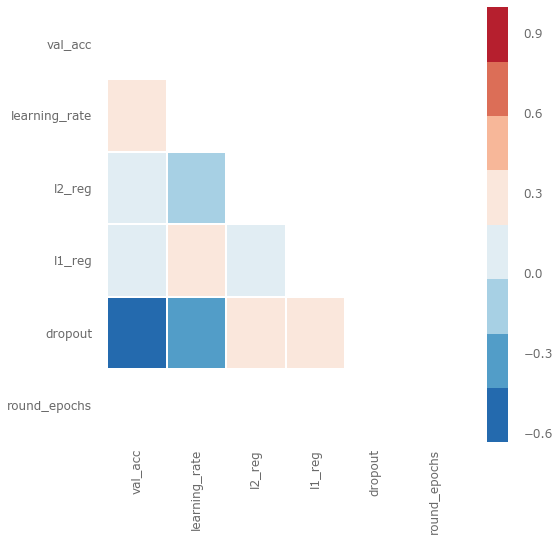

In [22]:
a = ta.Analyze(t)
a.plot_corr('val_acc', ['loss', 'acc', 'precision', 'recall', 'f1score',
                            'val_loss', 'val_acc', 'val_precision', 'val_recall'])

In [23]:
#  
sgd=optimizers.SGD(lr=0.01)
bestmodel.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

print("""test loss: %.2f
test accuracy: %.2f
""" % tuple(bestmodel.evaluate(X_test, y_test)))

38/38 [==============================] - 1s 37ms/step
test loss: 10.57
test accuracy: 0.79



In [24]:
predicted_classes = bestmodel.predict(X_test)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(5)]
y_test_classes = np.argmax(y_test, axis=-1)
print(classification_report(y_test_classes, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.25      0.50      0.33         2
     Class 1       0.75      0.67      0.71         9
     Class 2       0.82      0.90      0.86        10
     Class 3       0.80      0.75      0.77        16
     Class 4       0.00      0.00      0.00         1

    accuracy                           0.74        38
   macro avg       0.52      0.56      0.53        38
weighted avg       0.74      0.74      0.74        38



In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test_classes, predicted_classes)

array([[ 1,  0,  0,  1,  0],
       [ 2,  6,  0,  1,  0],
       [ 0,  0,  9,  1,  0],
       [ 1,  2,  1, 12,  0],
       [ 0,  0,  1,  0,  0]])